In [53]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile, StringIO, requests
from sklearn.linear_model import LogisticRegression


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [74]:
z = zipfile.ZipFile('data')
df = pd.read_csv(z.open('train.csv'))

In [90]:
def data_clean(df_org):
    df = df_org.copy()
    col_to_drop = []
    for col in df.columns:
        if df[col].dtype == 'O':  # if df is categorical, ie: dtype = 'O' object
#             df[col] = pd.Categorical(df[col]).codes
            #create dummy variable
#             print len(df[col].unique())
#             df[df[col].unique()] = pd.get_dummies(df[col])
            col_to_drop.append(col)
        else:
            df[col].fillna(0, inplace=True)
    df.drop(col_to_drop, axis=1, inplace=True)
    return df


In [98]:
len(df)

114321

In [101]:
df_copy= data_clean(df).sample(int(len(df)*0.2))

In [102]:
X = df_copy.drop(['ID','target'], axis=1)
y = df_copy['target']

In [136]:
n_step = 50
coeff = np.zeros((n_step, len(X.columns)))
# print 'coeff', coeff
for idx, c in enumerate(np.logspace(-5,0,n_step)):
    model = LogisticRegression(penalty='l1', C=c)  # c is inverse of lambda coefficient
    model.fit(X, y)
    coeff[idx]= model.coef_[0]
#     print coeff[idx]

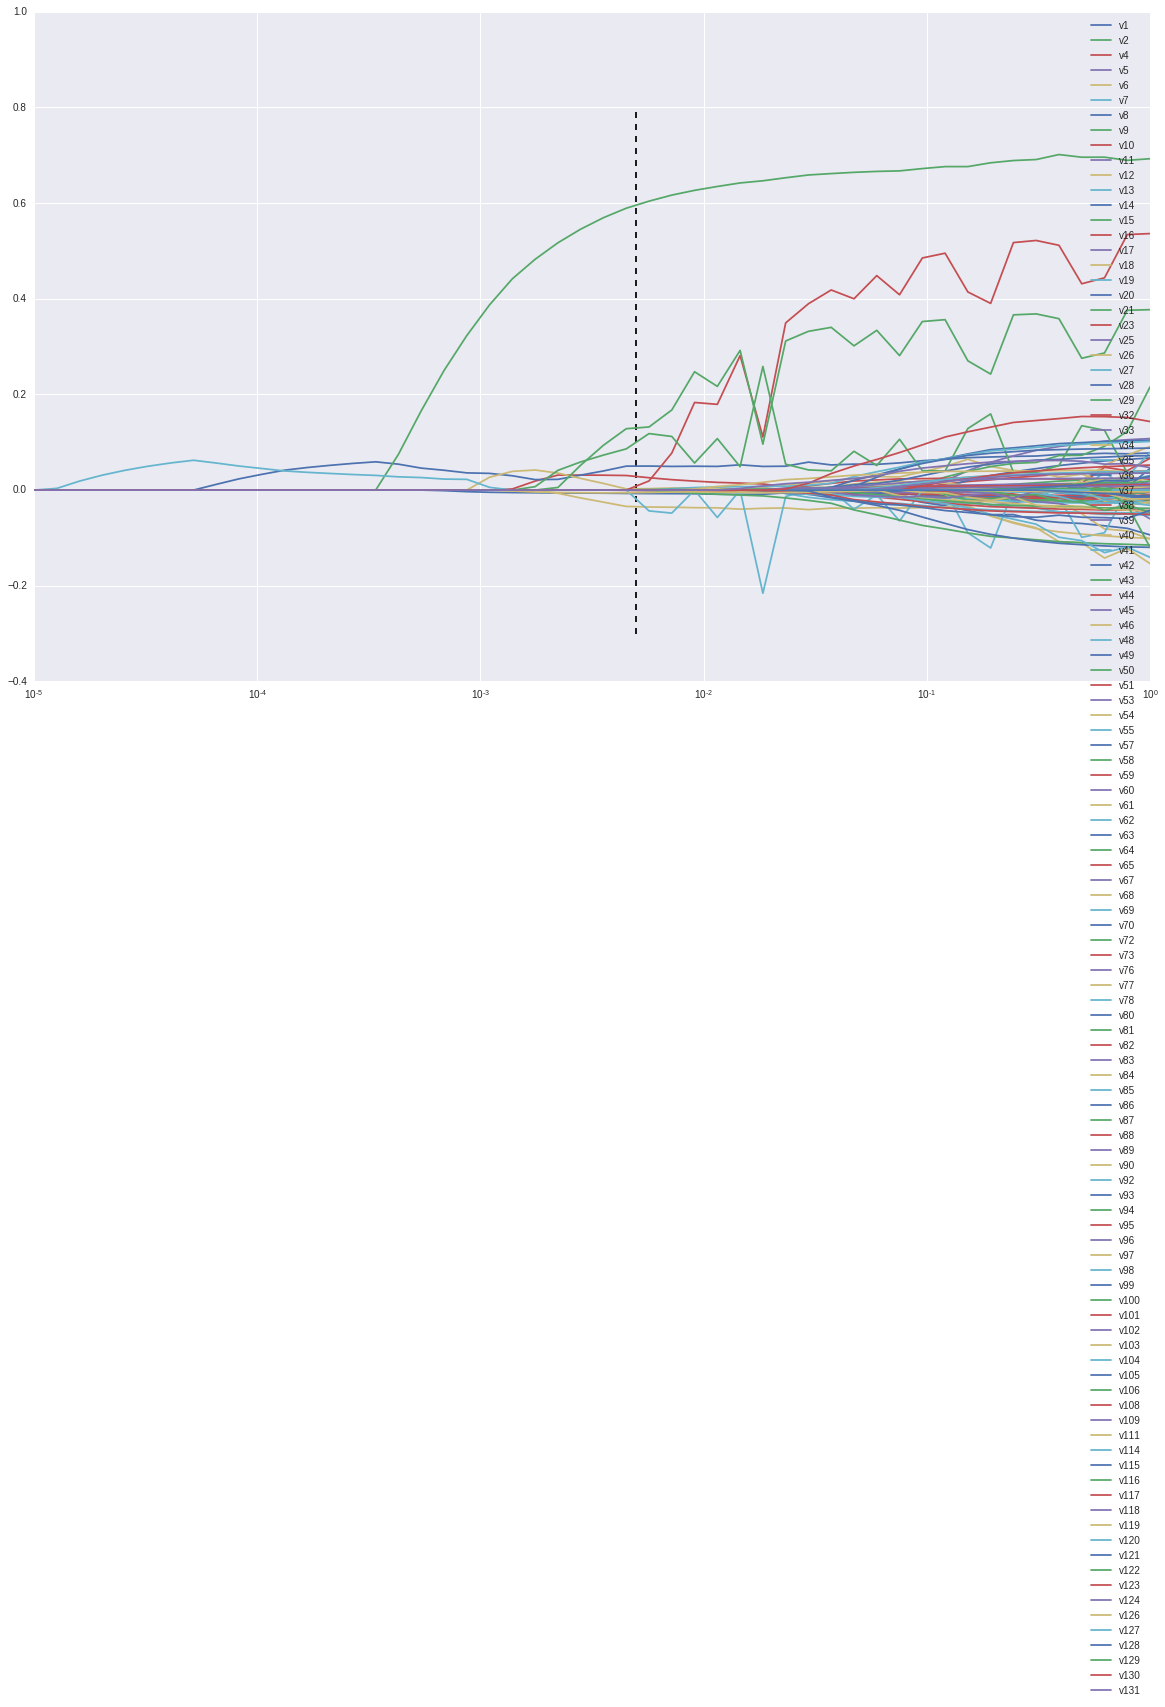

In [165]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)

for i in range(coeff.shape[1]):
    ax.plot(np.logspace(-5,0,50), coeff[:,i], label=X.columns[i])
ax.legend()
ax.set_xscale('log')
ax.vlines(0.005, -0.3, 0.8, linestyle = '--')

In [149]:
coeff.shape

(50, 112)

In [163]:
X.columns[(coeff[26]!=0)]

Index([u'v10', u'v14', u'v23', u'v34', u'v36', u'v40', u'v50', u'v72', u'v106',
       u'v119', u'v129'],
      dtype='object')